# **Loading Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np

data1 = pd.read_csv('credit_score_cleaned_train - Copy.csv')
data1

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,total_emi_per_month,...,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x2093a,CUS_0x79c0,January,Jant,45,274-96-0067,Teacher,50690.91,3945.2424,326.595900,...,8,Bad,2698.44,33.525350,115,Yes,72.10296,High_spent_Medium_value_payments,245.82542,1
1,0x2093b,CUS_0x79c0,February,Jant,45,274-96-0067,Teacher,50690.91,3945.2424,326.595900,...,8,Bad,2698.44,35.213080,116,Yes,486.44490,Low_spent_Small_value_payments,188.87817,0
2,0x2093c,CUS_0x79c0,March,Jant,45,274-96-0067,Teacher,50690.91,3945.2424,326.595900,...,8,Bad,2698.44,40.988130,117,Yes,101.85788,Low_spent_Small_value_payments,216.07050,0
3,0x2093d,CUS_0x79c0,April,Jant,45,274-96-0067,Teacher,50690.91,3945.2424,326.595900,...,8,Bad,2698.44,30.285970,118,Yes,101.85788,High_spent_Medium_value_payments,208.19632,0
4,0x2093e,CUS_0x79c0,May,Jant,45,274-96-0067,Teacher,50690.91,3945.2424,326.595900,...,8,Bad,2698.44,37.772490,119,Yes,188.81891,Low_spent_Medium_value_payments,159.10947,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88587,0x25dd9,CUS_0x1d9e,April,Emma Thomassons,42,861-85-5004,Lawyer,75994.22,6301.8516,51.702824,...,3,Good,111.75,29.832674,329,No,129.73962,High_spent_Medium_value_payments,698.74274,2
88588,0x25dda,CUS_0x1d9e,May,Emma Thomassons,42,861-85-5004,Lawyer,75994.22,6301.8516,51.702824,...,3,Good,111.75,36.127617,330,No,455.80722,Low_spent_Large_value_payments,392.67510,2
88589,0x25ddb,CUS_0x1d9e,June,Emma Thomassons,42,861-85-5004,Lawyer,75994.22,6301.8516,51.702824,...,3,Good,111.75,32.522274,331,No,149.50945,High_spent_Large_value_payments,668.97290,2
88590,0x25ddc,CUS_0x1d9e,July,Emma Thomassons,42,861-85-5004,Lawyer,75994.22,6301.8516,51.702824,...,3,Good,111.75,32.039387,332,No,754.69806,Low_spent_Small_value_payments,113.78431,1


In [5]:
# To know about the count and the data type of each column

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88592 entries, 0 to 88591
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        88592 non-null  object 
 1   customer_id               88592 non-null  object 
 2   month                     88592 non-null  object 
 3   name                      88592 non-null  object 
 4   age                       88592 non-null  int64  
 5   ssn                       88592 non-null  object 
 6   occupation                88592 non-null  object 
 7   annual_income             88592 non-null  float64
 8   monthly_inhand_salary     88592 non-null  float64
 9   total_emi_per_month       88592 non-null  float64
 10  num_bank_accounts         88592 non-null  int64  
 11  num_credit_card           88592 non-null  int64  
 12  interest_rate             88592 non-null  int64  
 13  num_of_loan               88592 non-null  int64  
 14  type_o

From the above information, there are no empty values for any of the columns. non-null counts matches to total no.of records on the file.

In [11]:
# To show the no of rows and columns in a dataframe

data1.shape

(88592, 28)

# **Splitting data into train data and test data**

Column **credit_score** is our target column. The credit_score has values 0, 1 and 2 which represents credit rating- low, medium and high respectively.

Columns such as- **id, customer_id, month, name and ssn** do not govern credit_score so they have been dropped.

In [7]:
from sklearn.model_selection import train_test_split

X = data1.drop(['id','customer_id','month','name','ssn','credit_score'],axis=1)
Y = data1['credit_score']


traindataX, testdataX, traindataY, testdataY = train_test_split(X, Y, test_size=0.25)

traindataX.shape, testdataX.shape, traindataY.shape, testdataY.shape

((66444, 22), (22148, 22), (66444,), (22148,))

In [9]:
# To know statistics of each column including mean, median, standard deviation etc.

traindataX.describe()

,age,annual_income,monthly_inhand_salary,total_emi_per_month,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,amount_invested_monthly,monthly_balance
count,66444.000000,66444.000000,66444.000000,66444.000000,66444.000000,66444.000000,66444.000000,66444.000000,66444.000000,66444.000000,66444.000000,66444.000000,66444.00000,66444.000000,66444.000000,66444.000000,66444.000000
mean,32.943561,48953.809812,4070.798835,117.964855,5.519355,5.633120,15.202441,3.981187,21.928812,13.722940,10.714480,6.080579,1506.22927,32.170536,213.078547,637.488179,383.982583
std,10.659884,37467.400210,3119.911408,124.572623,2.587255,2.091209,8.872084,2.219738,15.211981,6.260328,6.914899,3.899279,1188.67426,5.070677,99.967859,2054.371769,196.639991
min,14.000000,7005.930000,303.645420,4.462838,0.000000,0.000000,1.000000,1.000000,-5.000000,0.000000,-6.490000,0.000000,0.23000,20.100769,1.000000,0.000000,0.007760
25%,24.000000,18894.020000,1582.166600,40.533092,4.000000,4.000000,8.000000,2.000000,10.000000,9.000000,5.570000,3.000000,601.58000,27.972186,134.000000,72.714105,265.083580
50%,33.000000,36135.190000,3022.302500,76.179860,6.000000,6.000000,15.000000,4.000000,19.000000,14.000000,9.690000,6.000000,1237.13000,32.176748,211.000000,132.567160,326.017520
75%,41.000000,69563.340000,5790.620000,161.356912,8.000000,7.000000,21.000000,6.000000,29.000000,19.000000,15.420000,9.000000,2132.54250,36.374940,292.000000,258.838355,446.413612
max,56.000000,179987.280000,15204.634000,2523.000000,11.000000,11.000000,34.000000,9.000000,67.000000,28.000000,36.490000,17.000000,4998.07000,49.564518,404.000000,10000.000000,1552.946000


# **Visualising Columns**

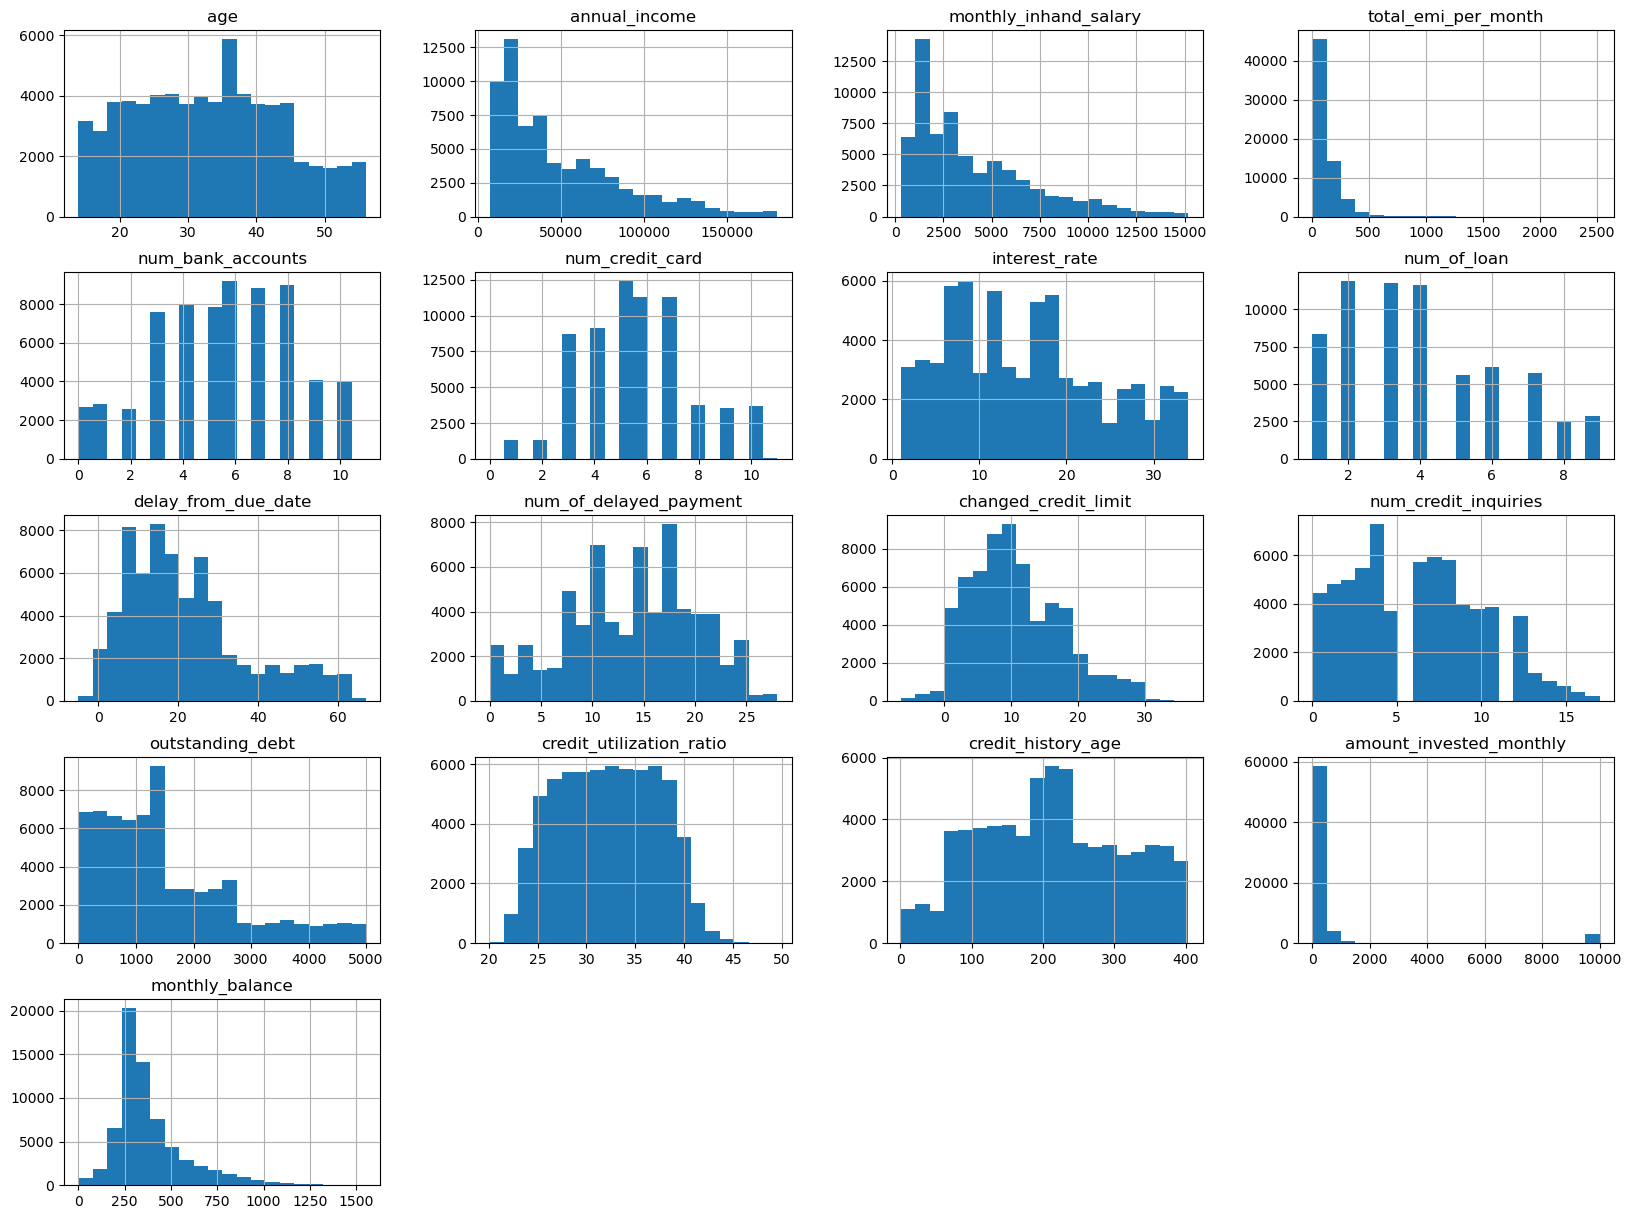

In [11]:
from matplotlib import pyplot as plt
traindataX.hist(bins=20, figsize=(20,15))
plt.show()

In the above histograms we see some of the data is skewed and couple of them are symmetrical like acceleration and model year

**Finding numerical columns from traindataX**

In [13]:
num_cols = [column for column in traindataX.columns if (traindataX[column].dtypes == np.int64) or (traindataX[column].dtypes == np.float64)]
num_cols

['age',
 'annual_income',
 'monthly_inhand_salary',
 'total_emi_per_month',
 'num_bank_accounts',
 'num_credit_card',
 'interest_rate',
 'num_of_loan',
 'delay_from_due_date',
 'num_of_delayed_payment',
 'changed_credit_limit',
 'num_credit_inquiries',
 'outstanding_debt',
 'credit_utilization_ratio',
 'credit_history_age',
 'amount_invested_monthly',
 'monthly_balance']

**Finding categorical data from traindataX**

In [15]:
cat_cols = [column for column in traindataX.columns if traindataX[column].dtypes == object]
cat_cols

['occupation',
 'type_of_loan',
 'credit_mix',
 'payment_of_min_amount',
 'payment_behaviour']

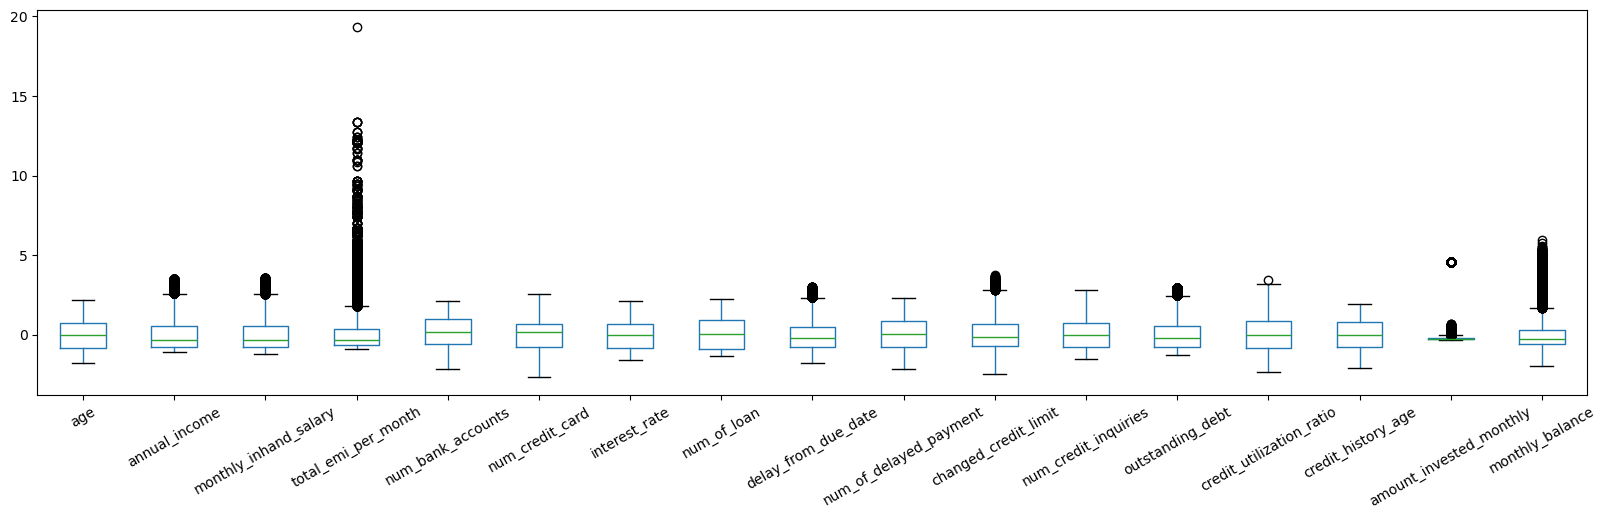

In [17]:
# Drawing box plot for all numerical columns

new = (traindataX[num_cols] - traindataX[num_cols].mean()) / traindataX[num_cols].std() # standardizes data around 0 and 1
new.boxplot(grid=False, figsize=(20,5), rot=30) # boxplot the columns
plt.show()

Through box plot, it is seen that total_emi_per_month and amount_invested_monthly have some outliers. We have to determine whether these outliers are due to errors or presence of any unusual case.


In [19]:
tepm = data1['total_emi_per_month']

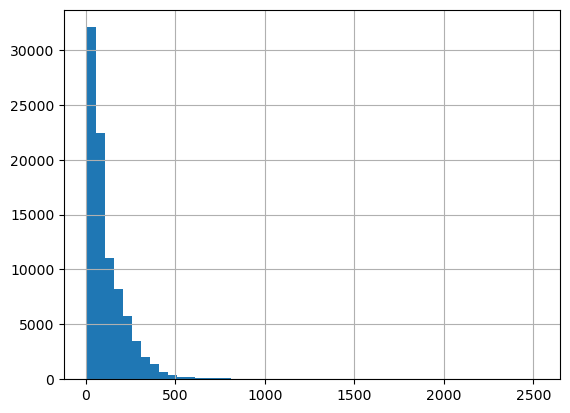

In [21]:
tepm.hist(bins=50)
plt.show()

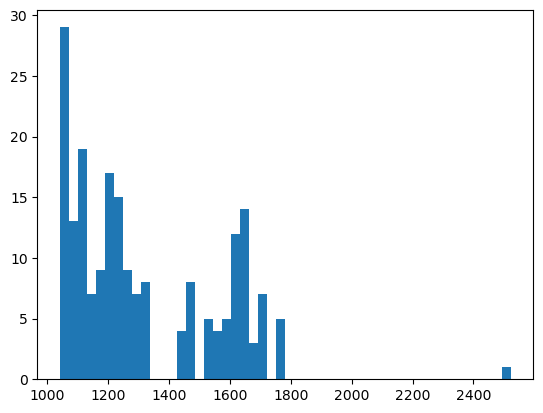

In [23]:
# Lets check the distribution for people having tepm > 1000

plt.hist(tepm[tepm>1000], bins=50)
plt.show()

In [25]:
# Lets check for people having tepm>2000

tepm[tepm>2000]

# Since there are only 2 people having tepm greater than 2000 hence theres no coded value
# This column is just skewed it has to undergo log transformation

78352    2523.0
Name: total_emi_per_month, dtype: float64

In [27]:
aim = data1['amount_invested_monthly']

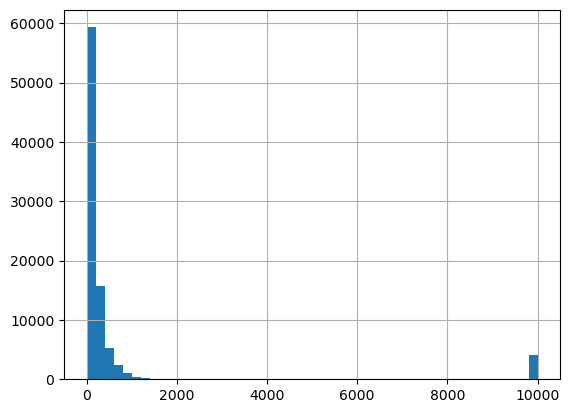

In [29]:
aim.hist(bins=50)
plt.show()

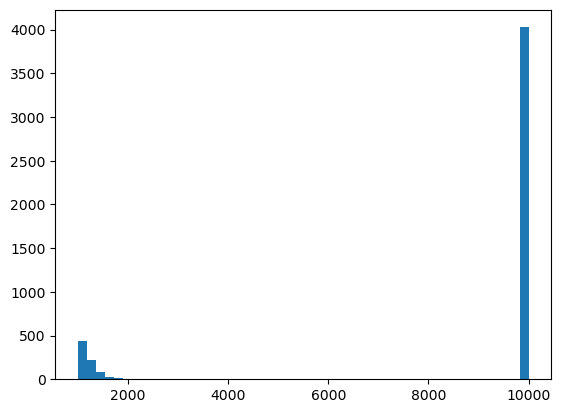

In [31]:
# Lets check the distribution for people having aim > 1000

plt.hist(aim[aim>1000], bins=50)
plt.show()

In [33]:
# Lets check for count of people having aim = 10000

aim[aim ==10000].value_counts()

amount_invested_monthly
10000.0    4026
Name: count, dtype: int64

Now repeating the above steps for the target column

In [35]:
traindataY.describe()

count    66444.000000
mean         0.852733
std          0.672889
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: credit_score, dtype: float64

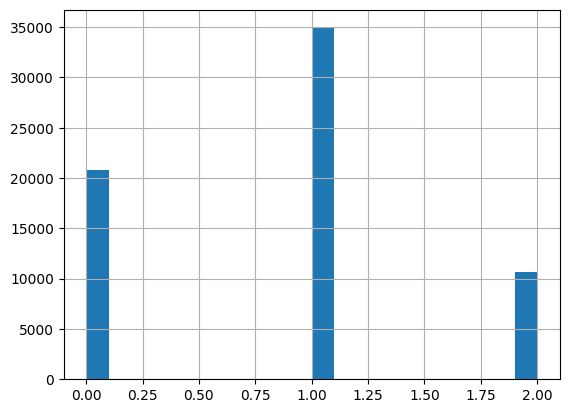

In [26]:
traindataY.hist(bins=20)
plt.show()

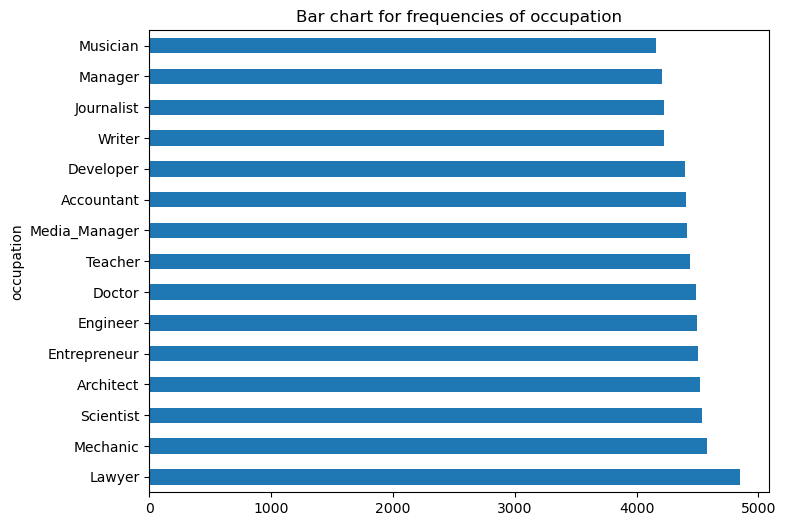


Showing top 50 categories for type_of_loan. There are more.


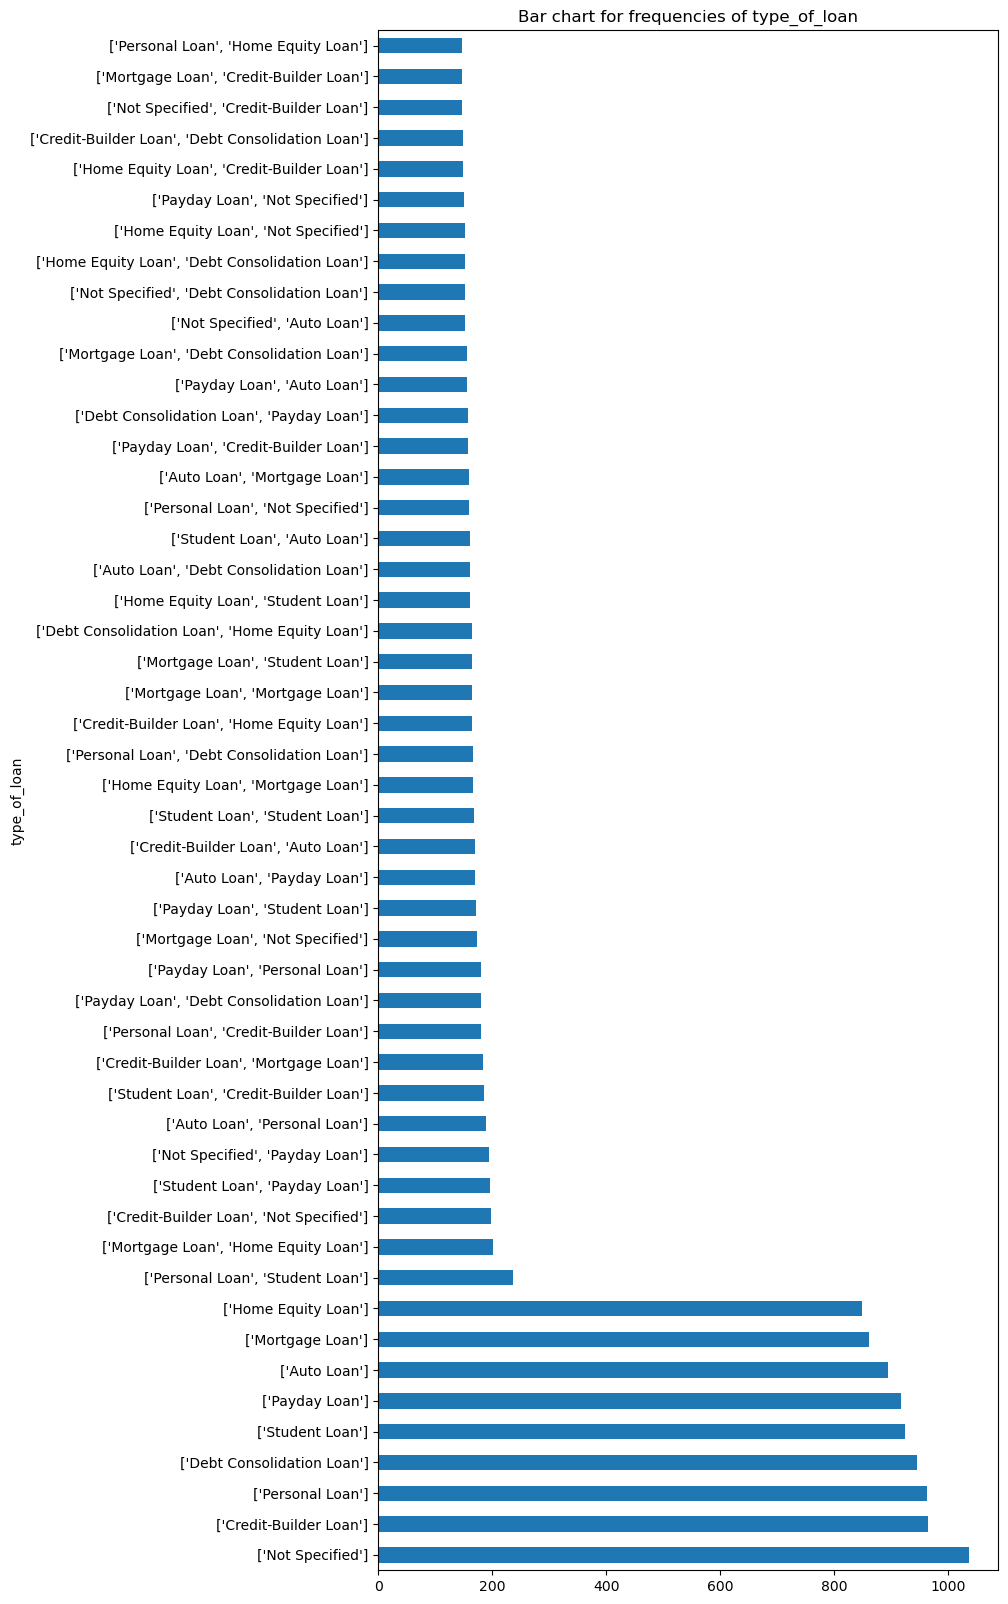

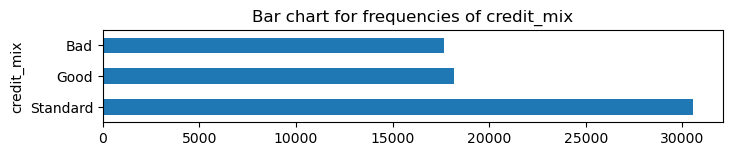

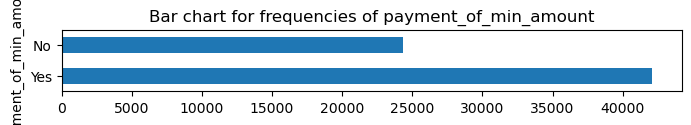

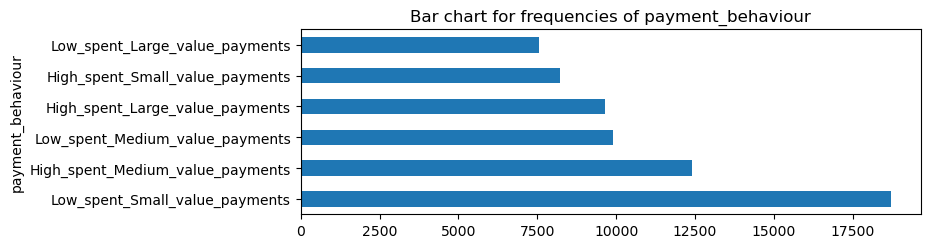

In [37]:
for col in cat_cols:
    freq_table = traindataX[col].value_counts()
    if len(freq_table) > 50:  # Adjust 50 as needed
        freq_table = freq_table[:50]  # Consider displaying top categories instead of all
        print(f"Showing top 50 categories for {col}. There are more.")
    plt.figure(figsize = (8,len(freq_table)*0.4)) #a bit formatting so that chart look better
    freq_table.plot.barh(title='Bar chart for frequencies of ' + col)
    plt.show()
    print()

**Categorizing the columns**

In [13]:
# As seen from histogram the below colours had normal distribution so they have been categorized into num_cols
num_cols = ['age', 'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan', 'num_of_delayed_payment', 'changed_credit_limit', 'credit_utilization_ratio', 'credit_history_age']
# num_cols = [column for column in traindataX.columns if (traindataX[column].dtypes == np.int64) or (traindataX[column].dtypes == np.float64)]

# The following columns were skewed as seen from histogram, hence they have to undergo log transformation, they have been classified into log_cols
log_cols = ['annual_income', 'monthly_inhand_salary', 'total_emi_per_month', 'delay_from_due_date','num_credit_inquiries','outstanding_debt','amount_invested_monthly', 'monthly_balance']

# The following columns had data type as object hence are categorized under cat_cols
cat_cols = ['occupation', 'type_of_loan', 'credit_mix', 'payment_of_min_amount', 'payment_behaviour']

# The below is the target column
target = ['credit_score']

# **Processing Pipeline**

In [9]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
def remove_0(X):
    # Ensure all columns exist in X before accessing them
    for col in ['num_bank_accounts', 'num_credit_card', 'num_of_delayed_payment', 'changed_credit_limit']:
        if col in X.columns:
            X.loc[X[col]==0, col] = np.nan
    return X


num_pipeline = Pipeline([
    ('remove 0', FunctionTransformer(remove_0, validate=False)),                      #now we need a small pipeline for numeric columns since it has two steps
    ('impute', SimpleImputer(strategy='median')),                                     #this step will impute missing values using column medians
    ('standardize', StandardScaler())                                                 #this step will scale all numeric columns
])

def log_transformation(x):
    x_clipped = np.clip(x, a_min=1e-8, a_max=None)
    return np.log(x_clipped)


def remove_0_log(X):
    # Ensure all columns exist in X before accessing them
    for col in ['delay_from_due_date', 'num_credit_inquiries','amount_invested_monthly']:
        if col in X.columns:
            X.loc[X[col]==0, col] = np.nan
    return X

log_pipeline = Pipeline([
     ('remove 0 log', FunctionTransformer(remove_0_log, validate=False)),                                    #now we need a small pipeline for numeric columns since it has two steps
    ('impute', SimpleImputer(strategy='median')),                #this step will impute missing values using column medians
    ('log transform', FunctionTransformer(log_transformation)), #this include a log transformation into the pipeline
    ('standardize', StandardScaler())                            #this step will scale all numeric columns
])

processing_pipeline = ColumnTransformer([                                                      #this transformer merges the processed numeric columns and class columns
    ('numeric', num_pipeline, num_cols),                                                       #numeric columns
    ('log', log_pipeline, log_cols),                                                           #log columns
    ('class', OneHotEncoder(max_categories=5, handle_unknown='infrequent_if_exist'), cat_cols) #encoder to transform class columns to numeric, this will automatically handle missing data
])

# **Data Modeling**

In [43]:
# Lets understand the target column

data1['credit_score'].value_counts()

credit_score
1    46546
0    27662
2    14384
Name: count, dtype: int64

As seen there are 3 unique values in credit_score column, which are 0, 1 and 2 representing Low, Medium, High respectively.

Hence, the credit_score column has **Multi-Class Classification**.

**LOGISTIC REGRESSION**

In [45]:
import numpy as np

print(np.isinf(data1[num_cols]).sum().sum(), "infinite values found")
print(np.isnan(data1[num_cols]).sum().sum(), "NaN values found")

0 infinite values found
0 NaN values found


In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

logistic_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('logistic', LogisticRegression(max_iter=5000, solver='saga'))
])

from sklearn.model_selection import GridSearchCV

#dictionaries for each component in multi_class and penalty
param_multi_class = {'logistic__multi_class': ['ovr','multinomial']}         # This is for 2 types of multi-class logistic regression: 1. ovr - one vs rest, 2. multinomial- softmax
param_l2_l1 = {'logistic__penalty': ['l2', 'l1'], 'logistic__C': [0.01, 0.1, 1, 10, 100]}    # for calculating li and l2 regression
param_enet = {'logistic__penalty': ['elasticnet'], 'logistic__C': [0.01, 0.1, 1, 10, 100], 'logistic__l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9]}    # for calculating elasticnet

#parameter grid that provides combination of ovr and multinomial with l1 and l2 or ovr and multinomial with elasticnet
param_grid = [
  param_multi_class | param_l2_l1,    # logistic with l1 and l2
  param_multi_class | param_enet,  #logistic with elasticnet penalty
]

grid_search = RandomizedSearchCV(logistic_pipeline, param_grid, cv=5, scoring='accuracy', return_train_score=True)



In [92]:
grid_search.fit(traindataX,traindataY)

C:\Users\saura\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\saura\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\saura\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\saura\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('processing',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('remove '
                                                                                                '0',
                                                                                                FunctionTransformer(func=<function remove_0 at 0x00000170760D0C20>)),
                                                                                               ('impute',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardize',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'num_bank_accounts',
                                                                                'num_credit_card',
                                                                                'interest_rate',
                                                                                'num_of_...
                                                                 solver='saga'))]),
                   param_distributions=[{'logistic__C': [0.01, 0.1, 1, 10, 100],
                                         'logistic__multi_class': ['ovr',
                                                                   'multinomial'],
                                         'logistic__penalty': ['l2', 'l1']},
                                        {'logistic__C': [0.01, 0.1, 1, 10, 100],
                                         'logistic__l1_ratio': [0.1, 0.25, 0.5,
                                                                0.75, 0.9],
                                         'logistic__multi_class': ['ovr',
                                                                   'multinomial'],
                                         'logistic__penalty': ['elasticnet']}],
                   return_train_score=True, scoring='accuracy')

In [96]:
# to find out the best parameter

grid_search.best_params_

{'logistic__penalty': 'l1',
 'logistic__multi_class': 'multinomial',
 'logistic__C': 100}

In [98]:
# to find the best estimator

grid_search.best_estimator_

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('remove 0',
                                                                   FunctionTransformer(func=<function remove_0 at 0x00000170760D0C20>)),
                                                                  ('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['age', 'num_bank_accounts',
                                                   'num_credit_card',
                                                   'interest_rate',
                                                   'num_of_loan',
                                                   'num_of_delayed_payment',
                                                   'chan...
                                                   'num_credit_inquiries',
                                                   'outstanding_debt',
                                                   'amount_invested_monthly',
                                                   'monthly_balance']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['occupation', 'type_of_loan',
                                                   'credit_mix',
                                                   'payment_of_min_amount',
                                                   'payment_behaviour'])])),
                ('logistic',
                 LogisticRegression(C=100, max_iter=5000,
                                    multi_class='multinomial', penalty='l1',
                                    solver='saga'))])

In [100]:
# to find the best score

grid_search.best_score_

0.6693606652263266

In [102]:
# to find the score of test data

grid_search.score(testdataX, testdataY)

0.6676900848835109

**SUPPORT VECTOR MACHINE**

In [17]:
# Splitting train-test to 5% to get sample data

from sklearn.model_selection import train_test_split

data = data1.drop(['id','customer_id','month','name','ssn'],axis=1)


trainsample, testsample = train_test_split(data, test_size=0.95)

trainsample.shape, testsample.shape

((4429, 23), (84163, 23))

In [19]:
# Fitting the processing_pipeline on train_sample and test_sample data

train_prc = processing_pipeline.fit_transform(trainsample)
test_prc = processing_pipeline.transform(testsample)

In [23]:
# Building pipeline for SVM

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

svc = Pipeline([
    ('processing', processing_pipeline),
    ('SVC', SVC())
])

param_grid = [
    {'SVC__kernel': ['linear'],
     'SVC__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'SVC__kernel': ['rbf'],
     'SVC__C': [0.001, 0.01, 0.1, 1, 10, 100],
     'SVC__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
]

grid_search = RandomizedSearchCV(svc, param_grid, cv=5, scoring='accuracy', return_train_score=True)

In [25]:
# Fitting SVM pipeline in the train_sample data

grid_search.fit(trainsample, trainsample[target])

C:\Users\saura\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\saura\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\saura\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\saura\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('processing',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               Pipeline(steps=[('remove '
                                                                                                '0',
                                                                                                FunctionTransformer(func=<function remove_0 at 0x00000243F0CFF740>)),
                                                                                               ('impute',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardize',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'num_bank_accounts',
                                                                                'num_credit_card',
                                                                                'interest_rate',
                                                                                'num_of_...
                                                                                             max_categories=5),
                                                                               ['occupation',
                                                                                'type_of_loan',
                                                                                'credit_mix',
                                                                                'payment_of_min_amount',
                                                                                'payment_behaviour'])])),
                                             ('SVC', SVC())]),
                   param_distributions=[{'SVC__C': [0.001, 0.01, 0.1, 1, 10,
                                                    100],
                                         'SVC__kernel': ['linear']},
                                        {'SVC__C': [0.001, 0.01, 0.1, 1, 10,
                                                    100],
                                         'SVC__gamma': [0.001, 0.01, 0.1, 1, 10,
                                                        100],
                                         'SVC__kernel': ['rbf']}],
                   return_train_score=True, scoring='accuracy')

In [27]:
grid_search.best_params_

{'SVC__kernel': 'rbf', 'SVC__gamma': 0.01, 'SVC__C': 100}

In [29]:
grid_search.best_estimator_

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('remove 0',
                                                                   FunctionTransformer(func=<function remove_0 at 0x00000243F0CFF740>)),
                                                                  ('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['age', 'num_bank_accounts',
                                                   'num_credit_card',
                                                   'interest_rate',
                                                   'num_of_loan',
                                                   'num_of_delayed_payment',
                                                   'chan...
                                                   'monthly_inhand_salary',
                                                   'total_emi_per_month',
                                                   'delay_from_due_date',
                                                   'num_credit_inquiries',
                                                   'outstanding_debt',
                                                   'amount_invested_monthly',
                                                   'monthly_balance']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['occupation', 'type_of_loan',
                                                   'credit_mix',
                                                   'payment_of_min_amount',
                                                   'payment_behaviour'])])),
                ('SVC', SVC(C=100, gamma=0.01))])

In [31]:
grid_search.best_score_

0.6631291527974392

In [33]:
grid_search.best_estimator_.score(testsample, testsample[target])

0.6789206658507896